In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PNN import PNN
from GRNN import GRNN
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris, load_diabetes, load_digits
from torchvision.transforms import ToTensor
from torchvision.datasets import FashionMNIST
from torch import squeeze
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

### PNN example

In [3]:
pnn = PNN(kernel="gaussian", sigma=0.5, n_classes=3, losses=[1,1,1])

In [4]:
df = load_iris(as_frame=True)
X = df['data'].to_numpy()
y = df['target'].to_numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [6]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [7]:
pnn.fit(X_train, y_train)

preds = [pnn.predict([x_test]) for x_test in X_test]

[0 1 2]


In [8]:
accuracy_score(y_test, preds)

1.0

### GRNN example

In [17]:
df = load_diabetes(as_frame=True)
X = df['data'].to_numpy()
y = df['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [19]:
grnn = GRNN(kernel="gaussian", sigma=0.4)
grnn.fit(X_train, y_train)
preds = [grnn.predict([x_test]) for x_test in X_test]
r2_score(y_test, preds)

0.03665635597596961

In [21]:
lr = LinearRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)

r2_score(y_test, preds)

0.4772897164322617

In [23]:
for sigma in np.arange(start=0.02, stop=1.0, step=0.01):
    grnn = GRNN(kernel="gaussian", sigma=sigma)
    grnn.fit(X_train, y_train)
    preds = [grnn.predict([x_test]) for x_test in X_test]
    print("".join(["-"]*80))
    print("Smoothing parameter: ", sigma)
    print("R2 score: ", r2_score(y_test, preds))

--------------------------------------------------------------------------------
Smoothing parameter:  0.02
R2 score:  0.24918404093742763
--------------------------------------------------------------------------------
Smoothing parameter:  0.03
R2 score:  0.3888858966517843
--------------------------------------------------------------------------------
Smoothing parameter:  0.039999999999999994
R2 score:  0.441418052100256
--------------------------------------------------------------------------------
Smoothing parameter:  0.049999999999999996
R2 score:  0.4459331944981647
--------------------------------------------------------------------------------
Smoothing parameter:  0.06
R2 score:  0.4284587136100836
--------------------------------------------------------------------------------
Smoothing parameter:  0.06999999999999999
R2 score:  0.4038364462109699
--------------------------------------------------------------------------------
Smoothing parameter:  0.07999999999999999
R2

### Digits

In [16]:
digits = load_digits(as_frame=True)
X = digits['data'].to_numpy()
y = digits['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

<Figure size 640x480 with 0 Axes>

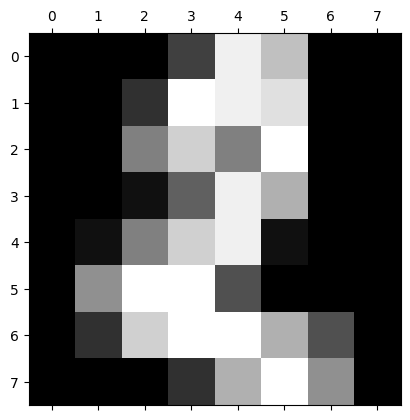

In [18]:
plt.gray()
plt.matshow(digits.images[2])

In [20]:
pnn = PNN(kernel="gaussian", sigma=0.8, n_classes=10, losses=[1]*10)

In [22]:
pnn.fit(X_train, y_train)

[0 1 2 3 4 5 6 7 8 9]


In [24]:
preds = [pnn.predict([x_test]) for x_test in X_test]

In [26]:
accuracy_score(y_test, preds)

0.9833333333333333

### Fashin MINST

In [28]:
train_data = FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# setup test data
test_data = FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [30]:
X_train = train_data.data.numpy().reshape(-1, 784)
y_train = train_data.targets.numpy()

X_test = test_data.data.numpy().reshape(-1, 784)
y_test = test_data.targets.numpy()

In [32]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [34]:
pnn = PNN(kernel="gaussian", sigma=0.5, n_classes=10, losses=[1]*10)
pnn.fit(X_train, y_train)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
preds = [pnn.predict([x_test]) for x_test in X_test]

/Users/g.vinogradov/Documents/Projects/regularization-pnn-grnn/Kernels/GaussianKernel.py:16: RuntimeWarning: overflow encountered in exp
  return np.exp(-dists / (2 * self._sigma**2)), dists


In [ ]:
accuracy_score(y_test, preds)